# AIM

To predict if corresponding to the gmat scores the student got admission or not 

***What is Logistic Regression?***
*  It is used to model probability of class or event
*  used for classification
*  p/(1-p)--odds
*  ln(p/(1-p))---log of odds

 ***LOSS FUNCTION***-
*   Used to calculate error in the model---->L(Loss Function)= Sigma 1 to n 
*   (yi-yi_bar) whole sq
*   yi= actual value

* yi_bar= peredicted value

*  xi=dependent variable
*   initially b0=b1=0






1.	Importing the relevant libraries 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split  
from sklearn.metrics import  accuracy_score, confusion_matrix#to verify accuracy
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

**2.	Loading the data**

In [ ]:
df=pd.read_csv('/content/Gmat_logistics_1.csv')


**3.	Visualizing the data frame and exploring the data**

In [ ]:
df.head(15)#visualizing

,gmat,admitted
0,780,1
1,750,1
2,690,1
3,710,1
4,680,1
5,730,1
6,690,1
7,720,1
8,740,1
9,690,1


In [ ]:
df.axes

[RangeIndex(start=0, stop=40, step=1),
 Index(['gmat', 'admitted'], dtype='object')]

In [ ]:
df.admitted.unique()#unique values in admitted column

array([1, 0])

In [ ]:
df.dtypes#values are present in integer format

gmat        int64
admitted    int64
dtype: object

In [ ]:
df.describe()

,gmat,admitted
count,40.000000,40.000000
mean,654.000000,0.525000
std,61.427464,0.505736
min,540.000000,0.000000
25%,607.500000,0.000000
50%,660.000000,1.000000
75%,690.000000,1.000000
max,780.000000,1.000000


**4.	Cleaning the data**

*Checking for null values*

In [ ]:
df['gmat'].isnull().values.any()

False

In [ ]:
df['admitted'].isnull().values.any()

False

In [ ]:
y=df['admitted']
x=df[['gmat']]

In [ ]:
print(type(x),type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


6.	Split the data into training set and test set

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

7.	Fit a logistic regression model using sklearn

In [ ]:
model=LogisticRegression()#using builtin Logistic regression in sklearn
model.fit(x_train,y_train)#training the data

LogisticRegression()

8.	Apply the model on the test data and make prediction

In [ ]:
y_pred=model.predict(x_test)#predicting on testing set
print("The predicted value is",y_pred)


The predicted value is [1 1 1 1 1 1 0 0]


9.	Create the confusion matrix and calculate the accuracy.

In [ ]:
ConfusionMatrix=confusion_matrix(y_test,y_pred)
print(ConfusionMatrix)

[[2 1]
 [0 5]]


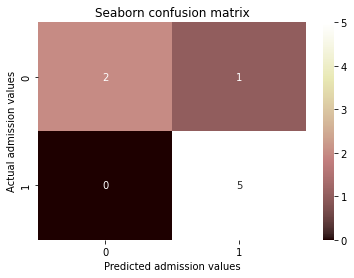

In [ ]:
cm=sns.heatmap(ConfusionMatrix,annot=True,cmap='pink')
cm.set_title('Seaborn confusion matrix')
cm.set_xlabel('Predicted admission values')
cm.set_ylabel('Actual admission values')

#cm.xaxis.set_ticklabels(['NO','YES'])
#cm.yaxis.set_ticklabels(['NO','YES'])
plt.show()

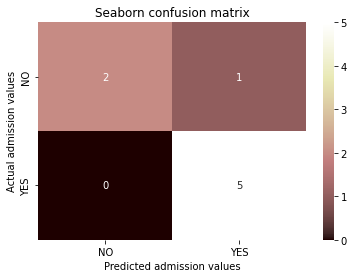

In [ ]:
cm=sns.heatmap(ConfusionMatrix,annot=True,cmap='pink')
#adding labels
cm.set_title('Seaborn confusion matrix')
cm.set_xlabel('Predicted admission values')
cm.set_ylabel('Actual admission values')

cm.xaxis.set_ticklabels(['NO','YES'])
cm.yaxis.set_ticklabels(['NO','YES'])
plt.show()

Accuracy score

In [ ]:
Accuracy=accuracy_score(y_test,y_pred)
print("Model Accuracy is ",Accuracy)

Model Accuracy is  0.875


Finding Accuracy from Confusion Matrix

In [ ]:
Pos=ConfusionMatrix[1,1]
Neg=ConfusionMatrix[0,0]
print(Pos,"people out of ",len(y_test),"were pedicted to get admission and actually also got admission")
print(Neg,"people out of ",len(y_test),"were pedicted to NOT get admission and actually also NOT got admission")
print(len(y_test))
Total=len(y_test)
print("Accuracy from ConfusionMatrix is ",(Pos+Neg)/Total)

5 people out of  8 were pedicted to get admission and actually also got admission
2 people out of  8 were pedicted to NOT get admission and actually also NOT got admission
8
Accuracy from ConfusionMatrix is  0.875


why we are adding constant?
http://www.talkstats.com/threads/logistic-regression-include-constant-in-the-model-or-not.26225/

In [ ]:
#using stats models for logistic regression
import statsmodels.api as sm
x_train=sm.add_constant(x_train)
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
result.summary()

         Current function value: 0.000439
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               admitted   No. Observations:                   32
Model:                          Logit   Df Residuals:                       30
Method:                           MLE   Df Model:                            1
Date:                Sat, 29 Jan 2022   Pseudo R-squ.:                  0.9994
Time:                        16:33:24   Log-Likelihood:              -0.014047
converged:                      False   LL-Null:                       -22.181
Covariance Type:            nonrobust   LLR p-value:                 2.770e-11
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -766.9295   1107.708     -0.692      0.489   -2937.996    1404.138
gmat           1.1706      1.691      0.692      0.489      -2.144       4.485
==============================================================================

Possibly complete quasi-separation: A fraction 0.84 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Conclusion
*   Model is 87.5% accurate


*   According to summary from stats models we can say that 84% of observations can be perfectly predicted


*   From confusion matrix we can conclude



> *   5 people out of  8 were pedicted to get admission and actually also got admission 
*   AND 2 people out of  8 were pedicted to NOT get admission and actually also NOT got admission






